In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/1주차/abalone.csv", index_col=None)
df["Sex"] = df["Sex"].map({"F": 0, "M": 1, "I": 2})
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Correlation Matrix

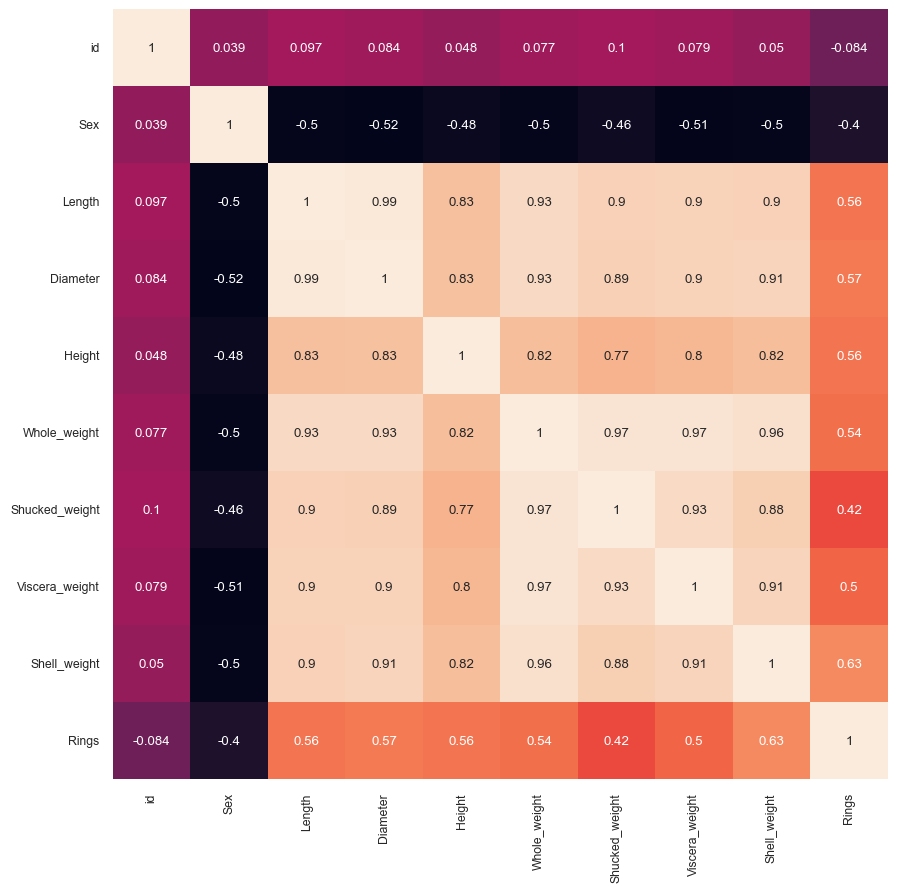

In [4]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [5]:
X = df.drop('Rings', axis=1)
X.head()


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [7]:
y = df['Rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 9) (3341,)
(836, 9) (836,)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('RMSE', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('RMSE', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('RMSE', mse(ly_preds, y_test))

RMSE 4.517508291352479
RMSE 4.517508291352479
RMSE 4.517508291352484


### Display the difference between predicted and actual values as a scatter plot

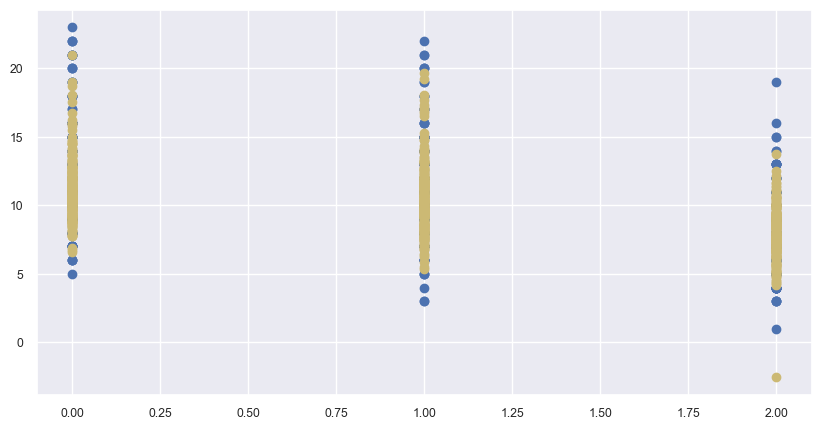

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Sex'], y_test, label='y_test')
plt.scatter(X_test['Sex'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  

### Random Forest Regressor

In [13]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('RMSE', mean_squared_error(ry_preds, y_test))

RMSE 3.311775717703349


### SVR

In [16]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.919100373507005


### KNN

In [17]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('RMSE', mean_squared_error(dy_preds, y_test))


RMSE 10.590909090909092


### DT

In [18]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 7.7990430622009566


### Linear Regression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 4.517508291352479
평균제곱근오차 4.517508291352479
평균제곱근오차 4.517508291352484
